# CIC prediction

In [24]:
from warnings import simplefilter
simplefilter('ignore')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

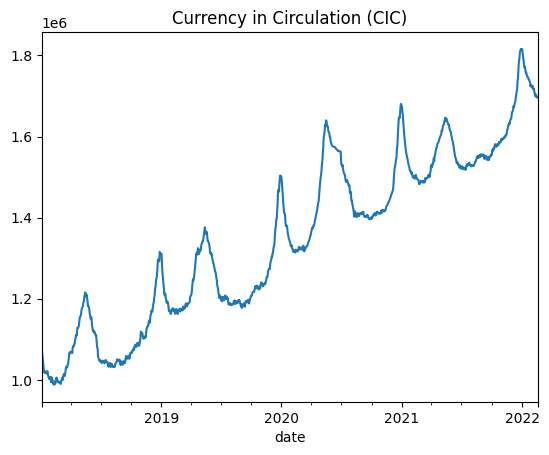

In [4]:
data = pd.read_excel('../../data/CIC.xlsx', parse_dates=['date'], index_col='date')
data['CIC'].plot(title = 'Currency in Circulation (CIC)'); plt.show()

## Section 2: Model Definition

In [68]:
from forecast_combine import model_select as f

from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.statsforecast import (
    StatsForecastAutoARIMA,
    StatsForecastAutoETS,
    StatsForecastAutoCES, 
    StatsForecastAutoTheta,
    StatsForecastMSTL,
    StatsForecastAutoTBATS,
)
from sktime.forecasting.fbprophet import Prophet

In [86]:
ForecastingModels = {
    "Naive": NaiveForecaster(),
    "Seasonal_Naive": NaiveForecaster(sp = 5),
    "AutoARIMA": StatsForecastAutoARIMA(
                    trend=True, seasonal=True,
                    max_D = 262, max_p= 10, max_q=10),
    "AutoETS": StatsForecastAutoETS(season_length=262, model='Z'),
    "AutoCES": StatsForecastAutoCES(season_length=262, model='Z'),
    "AutoTheta": StatsForecastAutoTheta(season_length=262),
    "AutoTBATS": StatsForecastAutoTBATS(seasonal_periods=262, use_trend =True, use_boxcox=True),
    "LOESS": StatsForecastMSTL(season_length=262),
    "Prophet": Prophet(yearly_seasonality=True, weekly_seasonality=True),
}

import imp; imp.reload(f)
model = f.ForecastModelSelect(
            data= data,
            depvar_str = 'CIC',                 
            exog_l=None,
            fh = 10,
            pct_initial_window=0.75,
            step_length = 5,
            models_d = ForecastingModels,
            freq = 'B',
            mode = 'best_horizon',
            score = 'RMSE', 
            nbest = 2)

### Cross validation Procedure

Number of Folds      : 53
Initial Window Size  : 808
Step Length          : 5
Forecast Horizon     : 10
First Cutoff         : 2021-02-05 00:00:00
Last Curoff          : 2022-02-04 00:00:00


<Axes: title={'center': 'Cross Validation Procedure'}, ylabel='Window number'>

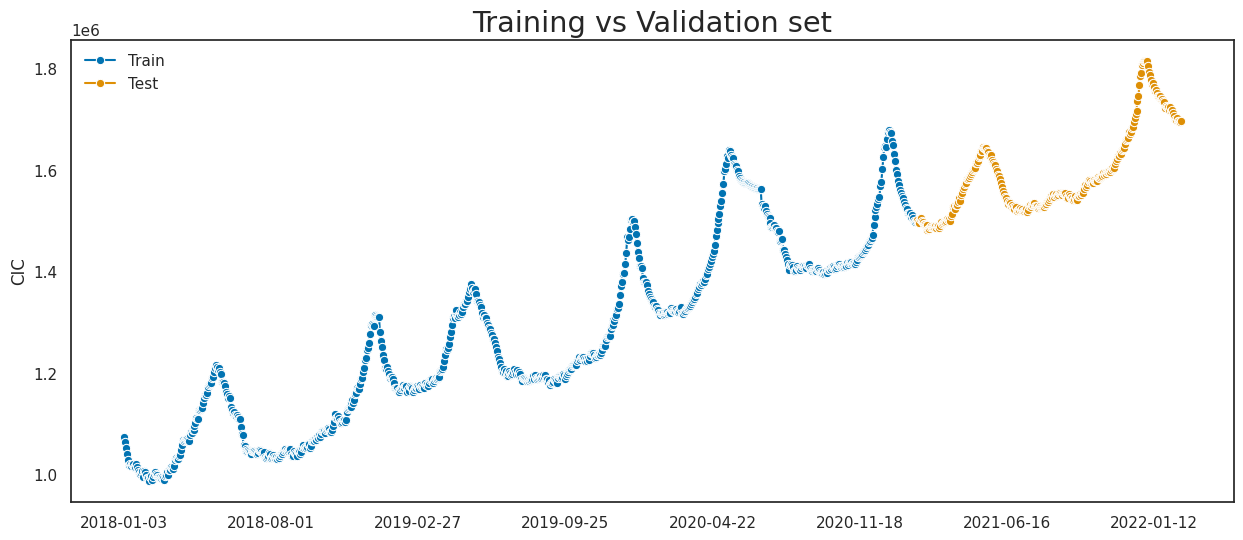

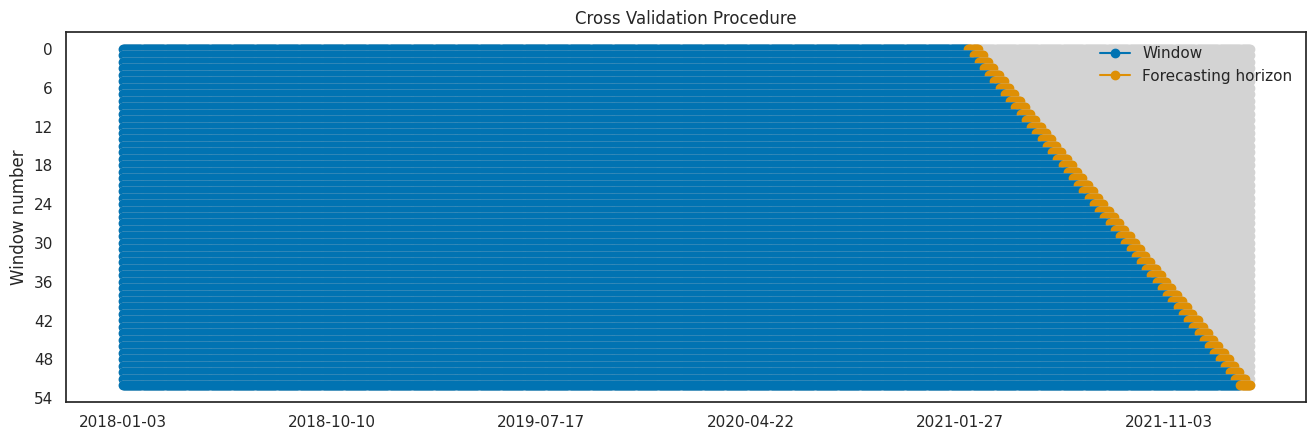

In [87]:
_ = model.split_procedure_summary()

model.plot_train_test(
    labels = ['Train', 'Test'],
    title='Training vs Validation set')

model.plot_cv_procedure(xlabel='')

### Out-Of-sample Evaluation

In [88]:
summary_horizon, summary_results = model.evaluate()


Start forecaster Naive evalution....
 Depending on the forecaster this step may take couple of minutes. Please don't kill the kernel


12134.17s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
12134.35s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
12134.53s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
12134.71s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
12134.89s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
12135.07s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
12135.25s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
12135.43s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
12135.60s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
12135.78s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
12135.96s - pydevd: Sending message rela

Evaluation time: 0.442 minutes

Start forecaster Seasonal_Naive evalution....
 Depending on the forecaster this step may take couple of minutes. Please don't kill the kernel


12155.88s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
12156.06s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
12156.24s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
12156.42s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
12156.59s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
12156.77s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
12156.95s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
12157.14s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Evaluation time: 0.024 minutes

Start forecaster AutoARIMA evalution....
 Depending on the forecaster this step may take couple of minutes. Please don't kill the kernel


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/

Evaluation time: 0.484 minutes

Start forecaster AutoETS evalution....
 Depending on the forecaster this step may take couple of minutes. Please don't kill the kernel
Evaluation time: 0.672 minutes

Start forecaster AutoTheta evalution....
 Depending on the forecaster this step may take couple of minutes. Please don't kill the kernel
Evaluation time: 0.824 minutes

Start forecaster TBATS evalution....
 Depending on the forecaster this step may take couple of minutes. Please don't kill the kernel


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated, please use `season_length` instead.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated, please use `season_length` instead.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated, please use `season_length` instead.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated, please use `season_length` instead.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated

Evaluation time: 0.529 minutes

Start forecaster LOESS evalution....
 Depending on the forecaster this step may take couple of minutes. Please don't kill the kernel
Evaluation time: 0.245 minutes

Start forecaster Prophet evalution....
 Depending on the forecaster this step may take couple of minutes. Please don't kill the kernel
Evaluation time: 0.045 minutes


In [89]:
display(summary_results.T.sort_values('Avg MAPE'))
display(summary_horizon.T)

,Number of Folds,Avg Fit time (s),Avg_pred_time (s),Smallest training window,Largest training window,First cutoff,Last cutoff,Avg MAPE,Avg RMSE
AutoETS,53,35.423099,0.331711,808,1068,2021-02-05,2022-02-04,0.006465,11736.409383
TBATS,53,22.649452,0.007806,808,1068,2021-02-05,2022-02-04,0.008508,15869.729296
Prophet,53,0.663902,0.076808,808,1068,2021-02-05,2022-02-04,0.009385,16288.987279
AutoTheta,53,29.232288,0.265304,808,1068,2021-02-05,2022-02-04,0.009453,17505.52317
Naive,53,0.004786,0.041951,808,1068,2021-02-05,2022-02-04,0.009626,17816.870378
AutoARIMA,53,19.352135,1.665504,808,1068,2021-02-05,2022-02-04,0.00976,18069.573562
LOESS,53,13.523526,0.61868,808,1068,2021-02-05,2022-02-04,0.011043,18747.25357
Seasonal_Naive,53,0.004932,0.046825,808,1068,2021-02-05,2022-02-04,0.012277,21920.786592


horizon                            1             2             3   \
Naive          RMSE       6008.811746   8493.850495  13120.374519   
               MAE        4450.905660   6590.641509   9694.245283   
               MAPE          0.002785      0.004090      0.005963   
               R2            0.994958      0.990023      0.976194   
               MedianAE   3003.000000   5309.000000   9074.000000   
Seasonal_Naive RMSE      19205.503930  18581.998451  18544.130069   
               MAE       14052.886792  13365.018868  13825.603774   
               MAPE          0.008619      0.008181      0.008464   
               R2            0.948491      0.952249      0.952443   
               MedianAE  10717.000000   9690.000000  11152.000000   
AutoARIMA      RMSE       6633.621347   9203.312847  13379.826380   
               MAE        4926.183582   6918.513939   9973.135662   
               MAPE          0.003093      0.004329      0.006179   
               R2            0.993855      0.988287      0.975243   
               MedianAE   3158.599778   5659.762965   7567.053158   
AutoETS        RMSE       5640.593184   7374.505492   9317.587558   
               MAE        4716.899898   5746.498554   7139.779794   
               MAPE          0.002974      0.003593      0.004460   
               R2            0.995557      0.992479      0.987994   
               MedianAE   4403.492188   4035.523438   5598.382812   
AutoTheta      RMSE       5894.175275   8314.734584  12967.891004   
               MAE        4342.933962   6482.084906   9548.728774   
               MAPE          0.002716      0.004019      0.005870   
               R2            0.995148      0.990439      0.976744   
               MedianAE   3268.875000   5322.500000   8112.750000   
TBATS          RMSE       5204.797533   6757.702261  10144.969860   
               MAE        4265.545608   5666.269844   7806.549784   
               MAPE          0.002689      0.003552      0.004855   
               R2            0.996217      0.993685      0.985767   
               MedianAE   3973.102900   5453.431126   6939.716774   
LOESS          RMSE      14786.406063  16153.814676  17286.835021   
               MAE       13428.201839  14675.691746  15214.174020   
               MAPE          0.008428      0.009214      0.009558   
               R2            0.969468      0.963914      0.958673   
               MedianAE  13622.443369  14879.530043  15387.849097   
Prophet        RMSE      16816.512224  16770.022882  17239.135920   
               MAE       12555.358569  12638.107309  13298.393293   
               MAPE          0.007764      0.007810      0.008255   
               R2            0.960509      0.961108      0.958901   
               MedianAE  10381.182985   9823.854419  10583.734278   

horizon                            4             5             6   \
Naive          RMSE      17052.199580  18969.734289  23101.171284   
               MAE       12542.660377  14297.735849  17128.396226   
               MAPE          0.007699      0.008756      0.010475   
               R2            0.960002      0.950206      0.926214   
               MedianAE  10558.000000  13731.000000  14945.000000   
Seasonal_Naive RMSE      19116.543085  18969.734289  34904.199685   
               MAE       14342.283019  14297.735849  26444.000000   
               MAPE          0.008786      0.008756      0.016144   
               R2            0.949732      0.950206      0.831554   
               MedianAE  10720.000000  13731.000000  20159.000000   
AutoARIMA      RMSE      16316.908475  18493.296072  22649.364565   
               MAE       12483.081010  14140.873782  16705.197311   
               MAPE          0.007741      0.008722      0.010251   
               R2            0.963377      0.952676      0.929072   
               MedianAE   9823.594372  12153.123498  12525.430890   
AutoETS        RMSE      10377.037203  12945.239112  14851.053551 

In [90]:
rank, score = model.select_best(score = 'MAPE')
display(rank)
display(score)

horizon,1,2,3,4,5,6,7,8,9,10
Best_1,TBATS,TBATS,AutoETS,AutoETS,AutoETS,AutoETS,AutoETS,AutoETS,AutoETS,AutoETS
Best_2,AutoTheta,AutoETS,TBATS,TBATS,TBATS,TBATS,Prophet,Prophet,Prophet,Prophet
Best_3,Naive,AutoTheta,AutoTheta,AutoTheta,Prophet,AutoTheta,TBATS,TBATS,LOESS,LOESS
Best_4,AutoETS,Naive,Naive,Naive,AutoTheta,AutoARIMA,AutoTheta,LOESS,TBATS,TBATS
Best_5,AutoARIMA,AutoARIMA,AutoARIMA,AutoARIMA,AutoARIMA,Prophet,Naive,AutoTheta,AutoTheta,AutoTheta
Best_6,Prophet,Prophet,Prophet,Prophet,Naive,Naive,AutoARIMA,Naive,Naive,AutoARIMA
Best_7,LOESS,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,LOESS,LOESS,AutoARIMA,AutoARIMA,Naive
Best_8,Seasonal_Naive,LOESS,LOESS,LOESS,LOESS,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive


,Naive,Seasonal_Naive,AutoARIMA,AutoETS,AutoTheta,TBATS,LOESS,Prophet,Best Model (over all),Best Model (per horizon),Best 2 Model (over all),Best 2 Model (per horizon)Model Avg (all models)
horizon,,,,,,,,,,,,
1,0.002785,0.008619,0.003093,0.002974,0.002716,0.002689,0.008428,0.007764,0.002974,0.002689,0.002831,0.002702
2,0.004090,0.008181,0.004329,0.003593,0.004019,0.003552,0.009214,0.007810,0.003593,0.003552,0.003572,0.003572
3,0.005963,0.008464,0.006179,0.004460,0.005870,0.004855,0.009558,0.008255,0.004460,0.004460,0.004658,0.004658
4,0.007699,0.008786,0.007741,0.005426,0.007601,0.006045,0.009438,0.008229,0.005426,0.005426,0.005736,0.005736
5,0.008756,0.008756,0.008722,0.006179,0.008587,0.007565,0.010481,0.008365,0.006179,0.006179,0.006872,0.006872
6,0.010475,0.016144,0.010251,0.007205,0.010200,0.009259,0.011540,0.010313,0.007205,0.007205,0.008232,0.008232
7,0.011880,0.015949,0.012041,0.007553,0.011478,0.010576,0.012369,0.010455,0.007553,0.007553,0.009064,0.009004
8,0.013559,0.015931,0.013985,0.008495,0.013376,0.012223,0.012666,0.010967,0.008495,0.008495,0.010359,0.009731
9,0.015100,0.015984,0.015403,0.008822,0.015020,0.013451,0.012889,0.010810,0.008822,0.008822,0.011136,0.009816


<Axes: title={'center': 'Out of Sample Performance'}, xlabel='horizon', ylabel='MAPE'>

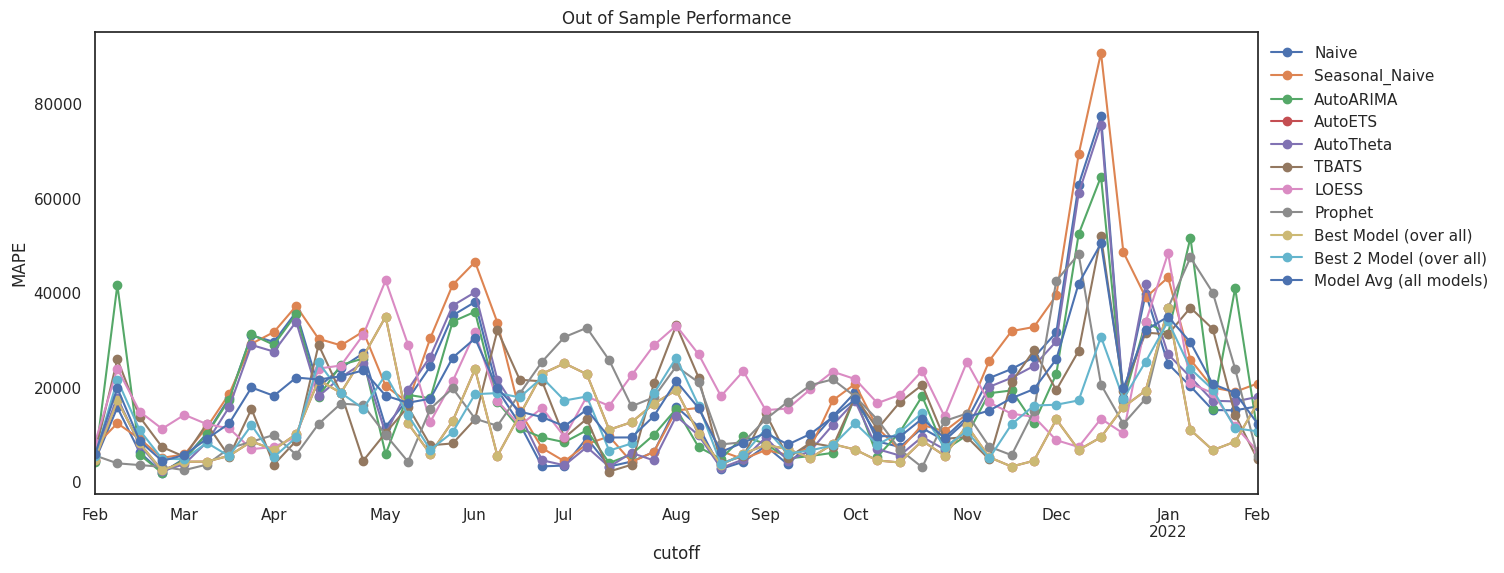

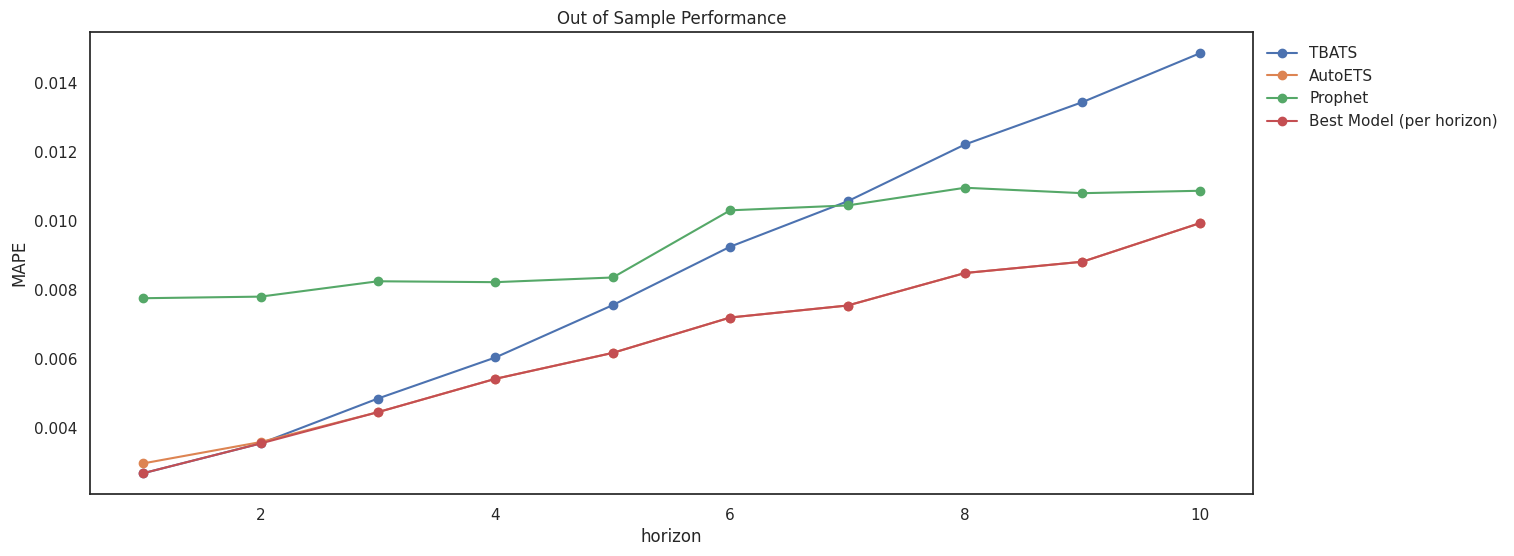

In [104]:
subset = ['TBATS', 'AutoETS', 'Prophet', 'Best Model (per horizon)']
model.plot_model_compare(score ='MAPE', view = 'cutoff')
model.plot_model_compare(score ='MAPE', view = 'horizon')

In [105]:
model.predict?

Signature:
model.predict(
    X: Optional[pandas.core.frame.DataFrame] = None,
    fh: Optional[sktime.forecasting.base._fh.ForecastingHorizon] = None,
    coverage: float = 0.9,
    mode: Optional[str] = None,
    score: Optional[str] = None,
    nbest: Optional[int] = None,
    ret_underlying: bool = False,
) -> Tuple[pandas.core.series.Series, pandas.core.frame.DataFrame]
Docstring:
Make forecasts using the specified aggregation mode.

Parameters:
-----------        
    X : pd.DataFrame, optional
        The exogenous variables used for prediction. Default is None and it takes the value entered at initialization..
    fh : ForecastingHorizon, optional
        The forecasting horizon. Default is None and it takes the value entered at initialization..
    coverage : float, optional
        The prediction interval coverage. Default is 0.9.
    mode : str, optional
        The aggregation mode for predictions. Default is None and it takes the value entered at initialization.. 
        

In [92]:
y_pred, y_pred_ints, preds, pred_ints = model.predict(ret_underlying=True)
model.plot_prediction(y_pred = y_pred,
                     models_preds = preds,
                     y_pred_interval = y_pred_ints)  


Model not fitted yet, or fitted on training sample alone
Fitting the model on the whole sample ...



Model not fitted yet, or fitted on training sample alone
Fitting the model on the whole sample ...

Model not fitted yet, or fitted on training sample alone
Fitting the model on the whole sample ...

Model not fitted yet, or fitted on training sample alone
Fitting the model on the whole sample ...

Model not fitted yet, or fitted on training sample alone
Fitting the model on the whole sample ...

Model not fitted yet, or fitted on training sample alone
Fitting the model on the whole sample ...

Model not fitted yet, or fitted on training sample alone
Fitting the model on the whole sample ...


NotImplementedError: StatsForecastMSTL does not have the capability to return prediction intervals. If you think this estimator should have the capability, please open an issue on sktime.

<Axes: title={'center': 'Out of Sample Performance - Average per Horizons'}, xlabel='Horizon', ylabel='MAPE'>

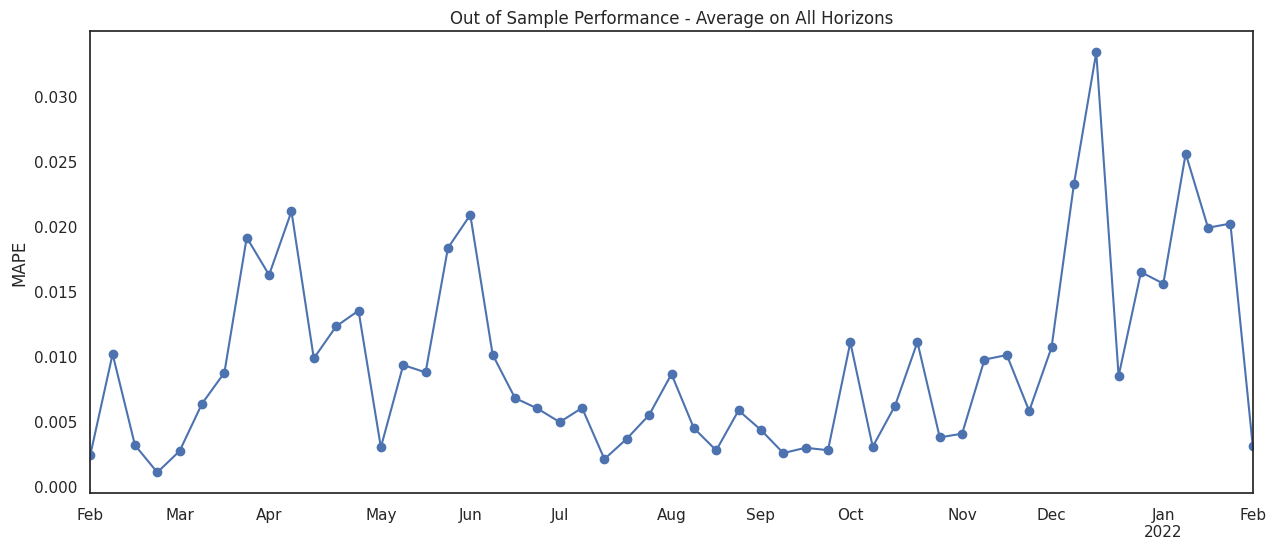

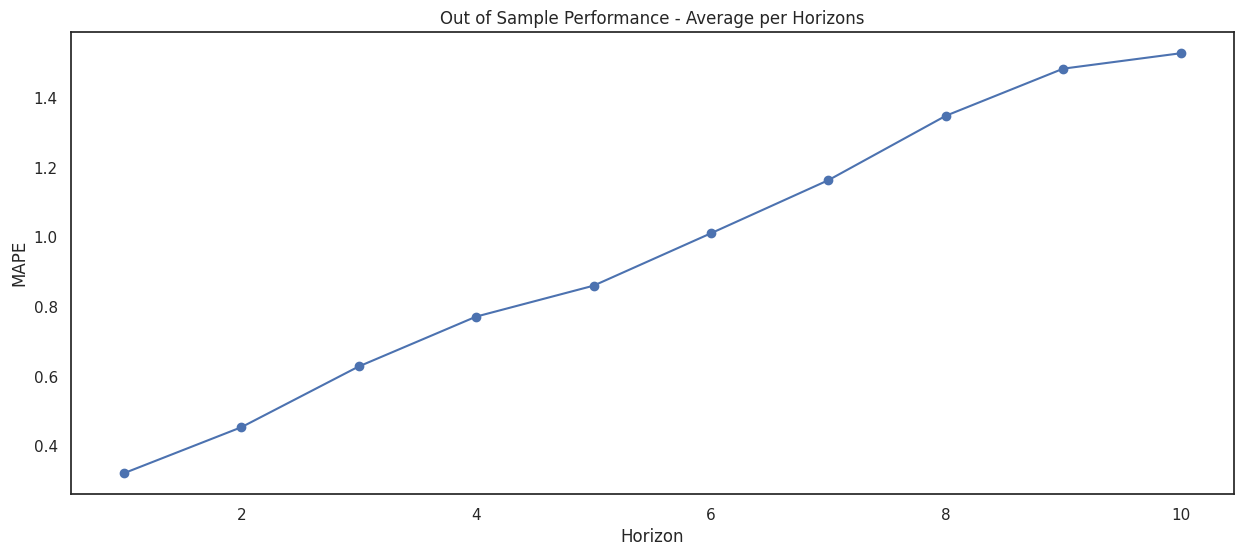

In [49]:
lf_eval.plot.plot_oos_score(score = 'MAPE')
lf_eval.plot.plot_oos_horizon(score = 'MAPE', xlabel = 'Horizon')

## Section 4: Generate predictions

In [53]:
# First Fit on all the sample
LF.fit(on ='all')
# Predict
y_pred, y_pred_ints = LF.predict()

(<Figure size 1300x500 with 1 Axes>,
 <Axes: title={'center': 'ARIMA Prediction'}, ylabel='CIC'>)

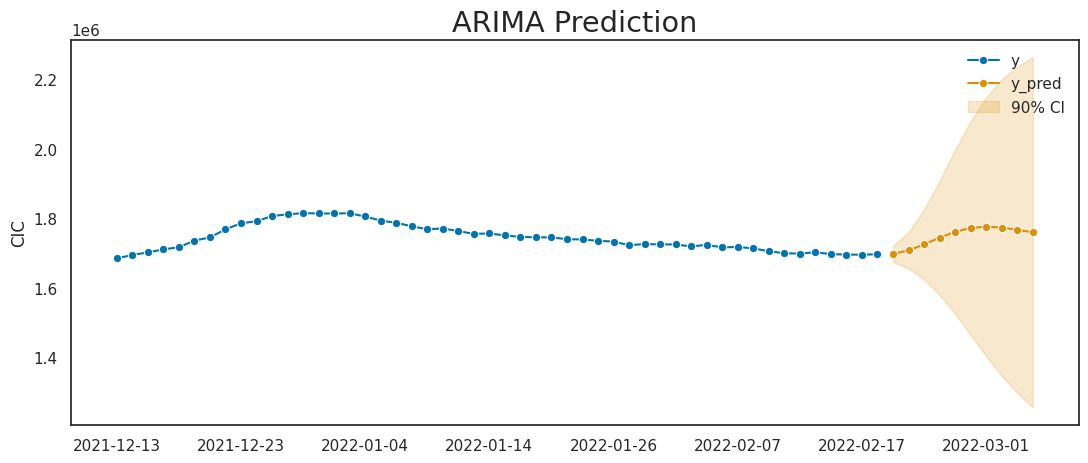

In [54]:
LF.plot.plot_prediction(y_pred, y_pred_ints, 
                        labels=['y', 'y_pred'], 
                        title = 'ARIMA Prediction', 
                        figsize = (13,5))

### Section 5: Update Predictions when new data comes in

### Either with or without refitting the model

(<Figure size 1500x600 with 1 Axes>,
 <Axes: title={'center': 'Prediction'}, ylabel='CIC'>)

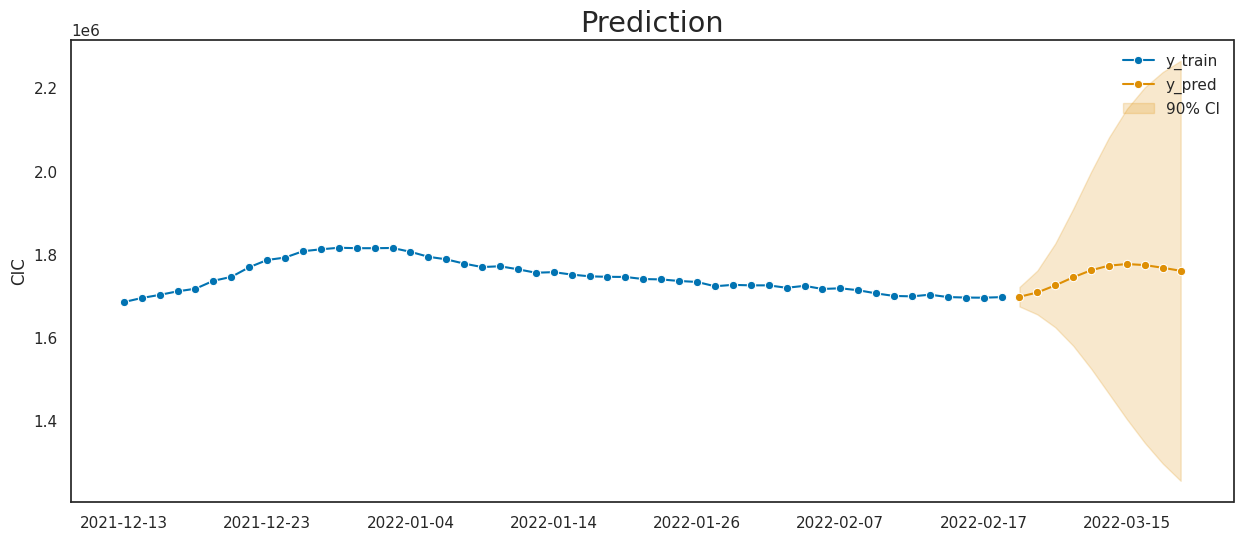

In [61]:
# create a dataframe with the new data
newdata = pd.concat([data, 
                     y_pred.to_frame()
                    ])
y_pred, y_pred_ints = LF.update(newdata = newdata, refit=False)
LF.plot.plot_prediction(y_pred, y_pred_ints)